In [1]:
import h5py 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import string

In [2]:
def sphere(r, center):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + r * np.outer(np.cos(u), np.sin(v))
    y = center[1] + r * np.outer(np.sin(u), np.sin(v))
    z = center[2] + r * np.outer(np.ones(np.size(u)), np.cos(v))
    return x, y, z

def plot_trajectories(trajectories_file, g, init_state):

    r = 1
    center = [0, 0, 0]

    gammas = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]
    gamma = gammas[g]

    with h5py.File(trajectories_file, 'r') as f:
        trajectory_exact = f["gamma_"+gamma][init_state]['bloch_exact'][:]  # Replace 'trajectory' with your dataset name
        trajectory_sid = f["gamma_"+gamma][init_state]['bloch_sid'][:]  # Replace 'trajectory' with your dataset name

    x, y, z = sphere(r, center)
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='plasma', edgecolor='none', alpha=0.4)

    # Add points
    top_point = [center[0], center[1], center[2] + r]
    bottom_point = [center[0], center[1], center[2] - r]
    ax.scatter(*top_point, color='green', s=10)
    ax.scatter(*bottom_point, color='red', s=10)

    # Add annotations
    ax.text(*top_point, "1 ", color='green', fontsize=15, horizontalalignment='right')
    ax.text(*bottom_point, "0 ", color='red', fontsize=15, horizontalalignment='right')

    # Plot trajectories
    ax.plot(trajectory_sid[:, 0], trajectory_sid[:,1], trajectory_sid[:, 2], color='green', linewidth=1, label='sid')
    ax.plot(trajectory_exact[:, 0], trajectory_exact[:,1], trajectory_exact[:, 2], color='red', linewidth=1, label='exact')
    init_point = [trajectory_exact[0, 0], trajectory_exact[0,1], trajectory_exact[0, 2]]
    ax.scatter(*init_point, color='blue', s=10)

    ax.legend()
    ax.set_title(r"$\gamma$="+gamma+", "+init_state)

    ax.set_axis_off()

def plot_traj_ax(ax, trajectories_file, gamma, ch, init_state):

    r = 1
    center = [0, 0, 0]

    with h5py.File(trajectories_file, 'r') as f:
        trajectory_exact = f["gamma_"+gamma][init_state]['bloch_exact'][:]  # Replace 'trajectory' with your dataset name
        trajectory_sid = f["gamma_"+gamma][init_state]['bloch_sid'][:]  # Replace 'trajectory' with your dataset name

    x, y, z = sphere(r, center)

    # Invert z values for color mapping
    z_color = -z  # Inverting z for color map

    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='plasma', edgecolor='none', alpha=0.3, facecolors=plt.cm.plasma(z_color))

    # Add points
    top_point = [center[0], center[1], center[2] + r]
    bottom_point = [center[0], center[1], center[2] - r]
    ax.scatter(*top_point, color='blue', s=10)
    #ax.scatter(*bottom_point, color='red', s=10)

    # Add annotations
    ax.text(*top_point, r"|0$\rangle$"+"\n", color='blue', fontsize=15, horizontalalignment='center', verticalalignment='bottom')
    #ax.text(*bottom_point, "1 ", color='orange', fontsize=15, horizontalalignment='right')

    # Plot trajectories
    ax.plot(trajectory_sid[:, 0], trajectory_sid[:,1], trajectory_sid[:, 2], color='green', linewidth=1, label='sid')
    ax.plot(trajectory_exact[:, 0], trajectory_exact[:,1], trajectory_exact[:, 2], color='red', linewidth=1, label='exact')
    init_point = [trajectory_exact[0, 0], trajectory_exact[0,1], trajectory_exact[0, 2]]
    ax.scatter(*init_point, color='green', s=10)

    #ax.legend()
    ax.set_title("("+ch+")\n\n"+r"$\gamma$="+gamma)

    ax.set_xlim([-.7, .7])
    ax.set_ylim([-.7, .7])
    ax.set_zlim([-.7, .7])
    ax.set_box_aspect([1,1,1]) 
    ax.set_axis_off()

def plot_fids_ax(ax, trajectories_file, gamma, ch, init_state):


    with h5py.File(trajectories_file, 'r') as f:
        fidelity = f["gamma_"+gamma][init_state]['fidelity'][:]  # Replace 'trajectory' with your dataset name
        #my_fidelity = f["gamma_"+gamma][init_state]['my_fidelity'][:]  # Replace 'trajectory' with your dataset name

    # Plot fidelities
    ax.plot( fidelity,  linewidth=1, label='fidelity')
    #ax.plot( my_fidelity,  linewidth=1, label='my fidelity')
    ax.legend()


def plot_bloch1_ax(ax, trajectories_file, gamma, ch, init_state):

    with h5py.File(trajectories_file, 'r') as f:
        trajectory_exact = f["gamma_"+gamma][init_state]['bloch_exact'][:]  # Replace 'trajectory' with your dataset name
        trajectory_sid = f["gamma_"+gamma][init_state]['bloch_sid'][:]  # Replace 'trajectory' with your dataset name


    # Plot trajectories
    ax.plot(trajectory_sid[:, 0],  linewidth=1, label='sid1')
    ax.plot(trajectory_exact[:, 0],  linewidth=1, label='exact1')
    ax.legend()

def plot_bloch2_ax(ax, trajectories_file, gamma, ch, init_state):

    with h5py.File(trajectories_file, 'r') as f:
        trajectory_exact = f["gamma_"+gamma][init_state]['bloch_exact'][:]  # Replace 'trajectory' with your dataset name
        trajectory_sid = f["gamma_"+gamma][init_state]['bloch_sid'][:]  # Replace 'trajectory' with your dataset name


    # Plot trajectories

    ax.plot(trajectory_sid[:,1], linewidth=1, label='sid2')
    ax.plot(trajectory_exact[:,1],  linewidth=1, label='exact2')
    ax.legend()


def plot_bloch3_ax(ax, trajectories_file, gamma, ch, init_state):

    with h5py.File(trajectories_file, 'r') as f:
        trajectory_exact = f["gamma_"+gamma][init_state]['bloch_exact'][:]  # Replace 'trajectory' with your dataset name
        trajectory_sid = f["gamma_"+gamma][init_state]['bloch_sid'][:]  # Replace 'trajectory' with your dataset name


    # Plot trajectories

    ax.plot( trajectory_sid[:, 2],  linewidth=1, label='sid3')
    ax.plot( trajectory_exact[:, 2],  linewidth=1, label='exact3')
    ax.legend()





In [5]:
dodeca_files = [f"State_D{n}" for n in range(1, 21)]
basis_files = [f"State_B{n}" for n in range(1, 5)]

gammas = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

gamma = "251.33"

init_state = dodeca_files[10]

trajectories_file = "../TESTS/POP_LME_5_Bloch_NO_CUT_trajectories_2024-Jan-31_at_10-54.h5"
#trajectories_file ="../TESTS/POP_LME_5_Bloch_CUT_trajectories_2024-Jan-31_at_11-04.h5"

with h5py.File(trajectories_file, 'r') as f:
    fidelity = f["gamma_"+gamma][init_state]['fidelity'][:]  # Replace 'trajectory' with your dataset name
    #my_fidelity = f["gamma_"+gamma][init_state]['my_fidelity'][:]  # Replace 'trajectory' with your dataset name

min(fidelity)#, min(my_fidelity)



0.7743206236312832

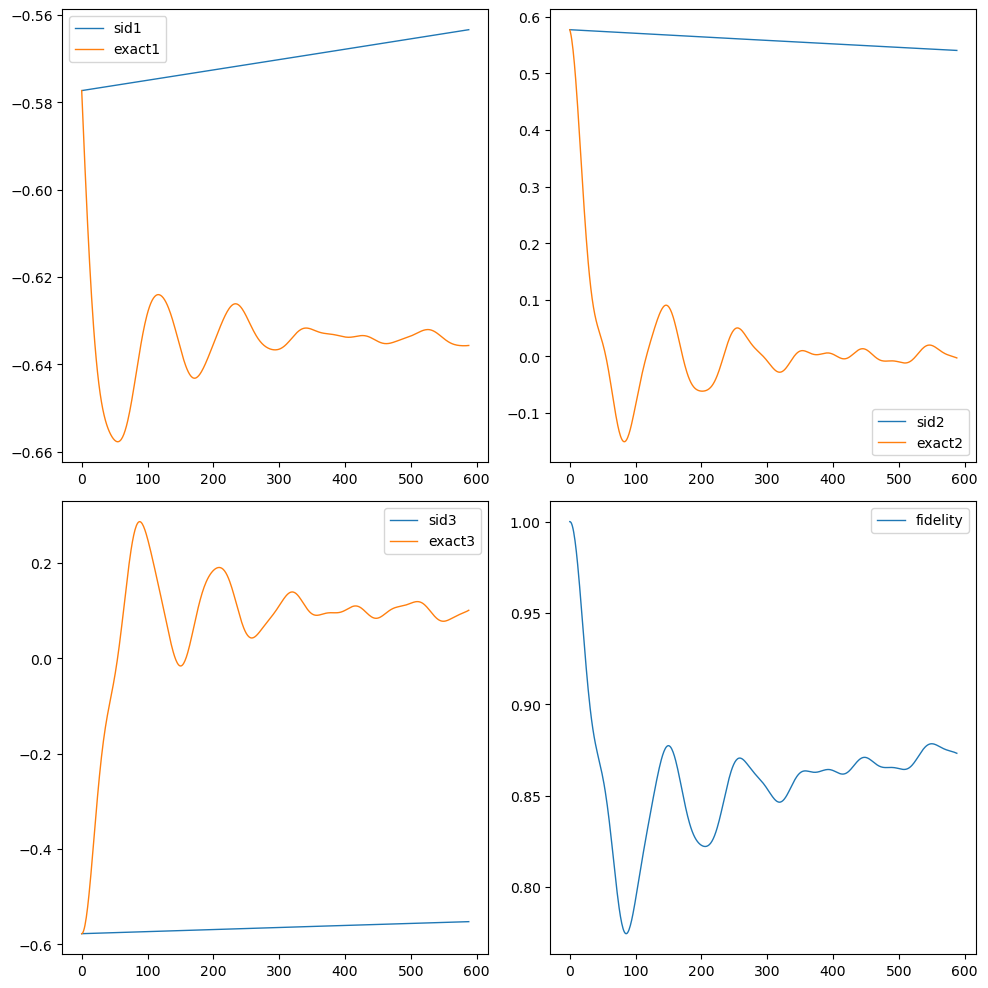

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plot_bloch1_ax(axs[0,0], trajectories_file, gamma, '(a)', init_state)
plot_bloch2_ax(axs[0,1], trajectories_file, gamma, '(b)', init_state)
plot_bloch3_ax(axs[1,0], trajectories_file, gamma, '(c)', init_state)
plot_fids_ax(axs[1,1], trajectories_file, gamma, '(d)', init_state)

fig.tight_layout()
plt.show()
fig.savefig("Bloch&Fidelity_FULL.pdf")

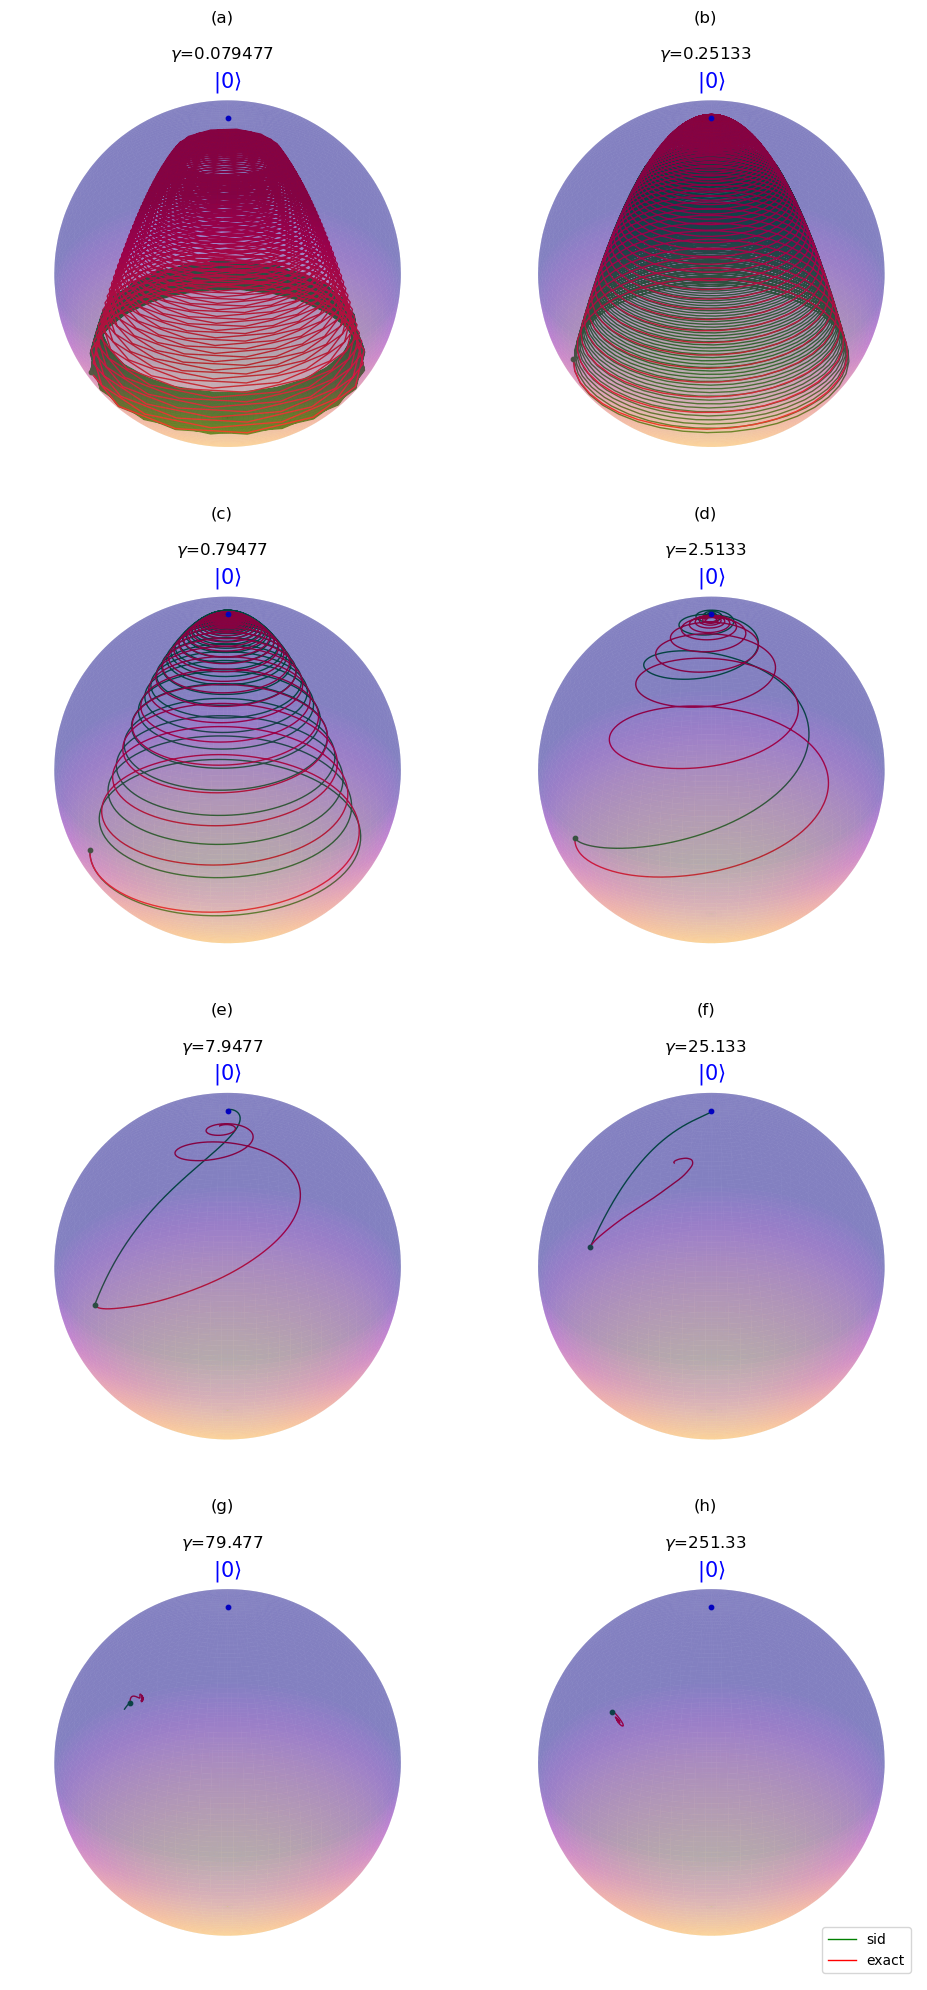

In [27]:
fig, axs = plt.subplots(4, 2, subplot_kw={'projection': '3d'}, figsize=(10, 20))

gammas = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

init_state = dodeca_files[10]

for ax,g, ch in zip(axs.ravel(),gammas,list(string.ascii_lowercase[:8])):
    plot_traj_ax(ax, trajectories_file, g, ch, init_state)
    ax.set_axis_off() 

axs[3,1].legend(loc='lower right')

fig.tight_layout()
plt.show()

#fig.savefig("Trajectories_LME_1.pdf")


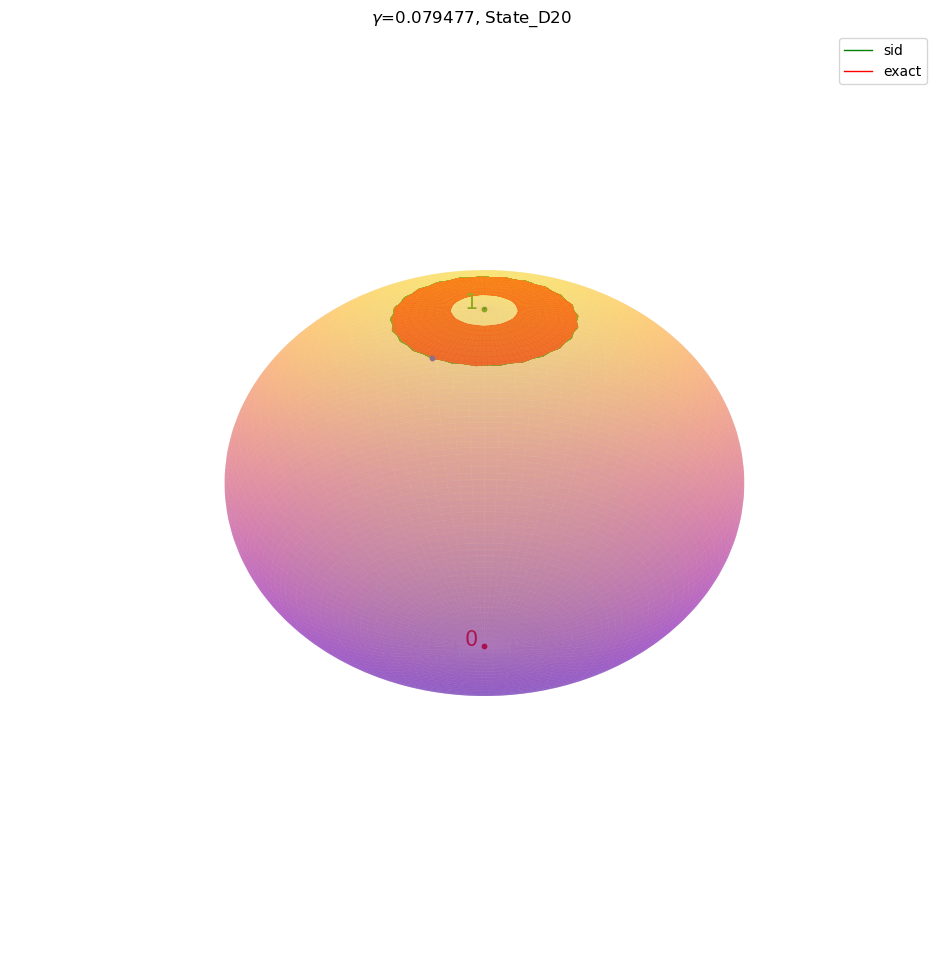

In [23]:
plot_trajectories(trajectories_file, 0, dodeca_files[19])
plt.show()

In [24]:
import numpy as np
import plotly.graph_objs as go


def plot_interactive_trajectories(trajectories_file, g, init_state):

    r = 1
    center = [0, 0, 0]

    x, y, z = sphere(r, center)

    gammas = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]
    gamma = gammas[g]

    with h5py.File(trajectories_file, 'r') as f:
        trajectory_exact = f["gamma_"+gamma][init_state]['bloch_exact'][:]  # Replace 'trajectory' with your dataset name
        trajectory_sid = f["gamma_"+gamma][init_state]['bloch_sid'][:]  # Replace 'trajectory' with your dataset name

    # Create Plotly figure
    fig = go.Figure()

    # Add sphere surface
    fig.add_trace(go.Surface(x=x, y=y, z=z, colorscale='Plasma', opacity=0.6,showscale=False))

    #ax.plot(trajectory_sid[:, 0], trajectory_sid[:,1], trajectory_sid[:, 2], color='green', linewidth=1, label='sid')
    #ax.plot(trajectory_exact[:, 0], trajectory_exact[:,1], trajectory_exact[:, 2], color='red', linewidth=1, label='exact')

    # Add trajectory
    fig.add_trace(go.Scatter3d(x=trajectory_sid[:, 0], y=trajectory_sid[:,1], z=trajectory_sid[:, 2], 
                               mode='lines', line=dict(color='blue', width=2), name='SID'))
    
    fig.add_trace(go.Scatter3d(x=trajectory_exact[:, 0], y=trajectory_exact[:,1], z=trajectory_exact[:, 2], 
                               mode='lines', line=dict(color='red', width=2), name='Exact spin-boson'))

    # Update layout for a better view
    fig.update_layout(title='Interactive 3D Sphere with Trajectory',
                      scene=dict(
                          xaxis_title='X',
                          yaxis_title='Y',
                          zaxis_title='Z',
                          xaxis=dict(nticks=4, range=[-1.2*r, 1.2*r]),
                          yaxis=dict(nticks=4, range=[-1.2*r, 1.2*r]),
                          zaxis=dict(nticks=4, range=[-1.2*r, 1.2*r])))

    fig.show()